In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd


<ipython-input-2-f4205fbbe842>:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


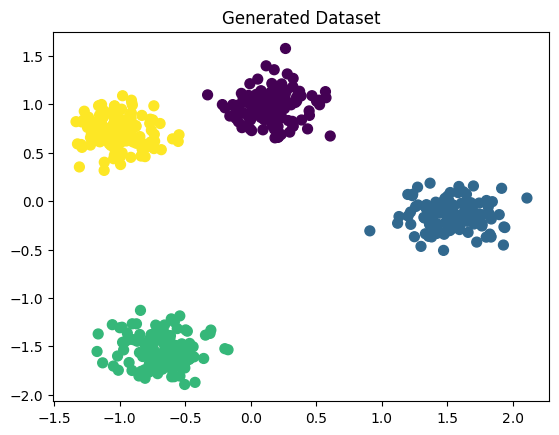

In [3]:
# Create a dataset with 4 clusters
X, y = make_blobs(n_samples=500, centers=4, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the generated data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', s=50)
plt.title('Generated Dataset')
plt.show()


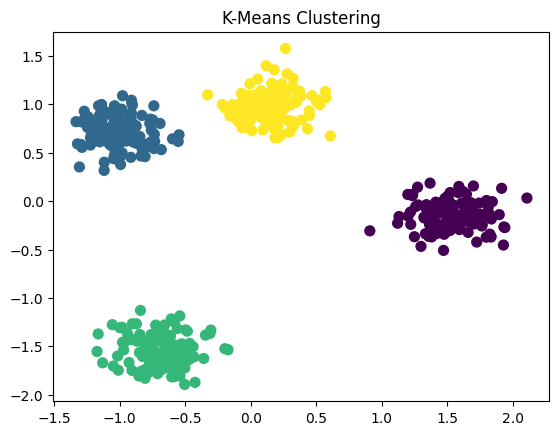

In [5]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize the K-Means results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.show()


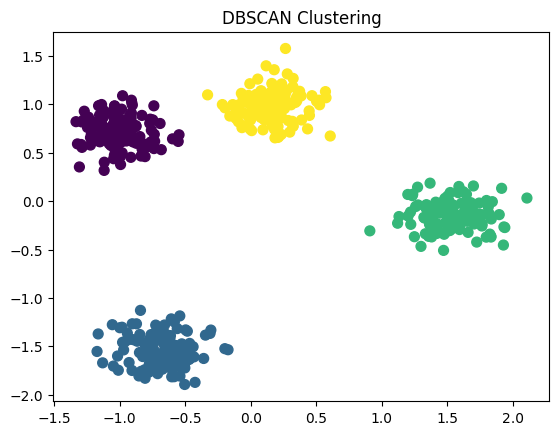

In [6]:
# Apply DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.show()


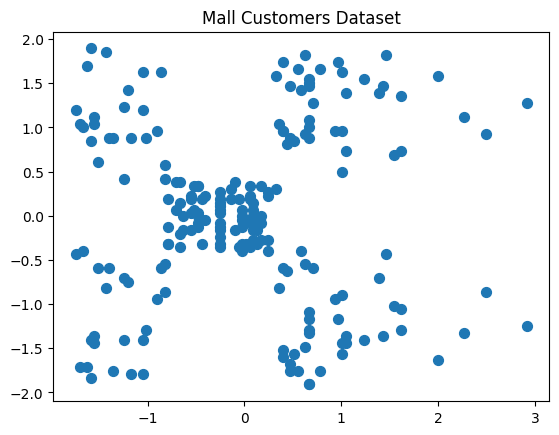

In [8]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Select the relevant features for clustering
X_mall = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
X_mall_scaled = scaler.fit_transform(X_mall)

# Visualize the data
plt.scatter(X_mall_scaled[:, 0], X_mall_scaled[:, 1], s=50)
plt.title('Mall Customers Dataset')
plt.show()


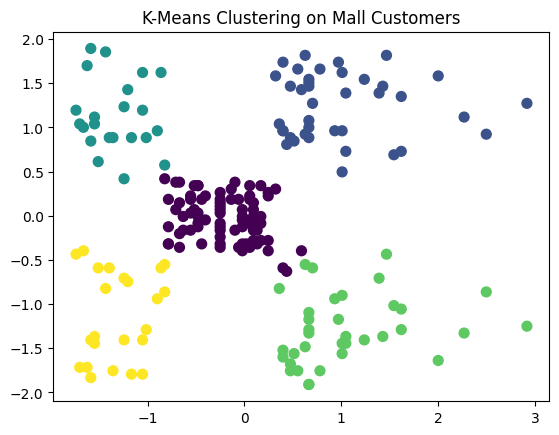

In [9]:
# Apply K-Means to Mall_Customers dataset
kmeans_mall = KMeans(n_clusters=5, random_state=42)
kmeans_mall_labels = kmeans_mall.fit_predict(X_mall_scaled)

# Visualize the K-Means results
plt.scatter(X_mall_scaled[:, 0], X_mall_scaled[:, 1], c=kmeans_mall_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering on Mall Customers')
plt.show()


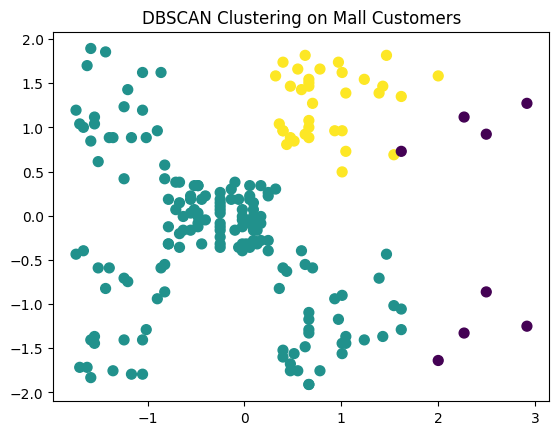

In [13]:
# Apply DBSCAN to Mall_Customers dataset
dbscan_mall = DBSCAN(eps=0.5, min_samples=5)
dbscan_mall_labels = dbscan_mall.fit_predict(X_mall_scaled)

# Visualize the DBSCAN results
plt.scatter(X_mall_scaled[:, 0], X_mall_scaled[:, 1], c=dbscan_mall_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering on Mall Customers')
plt.show()


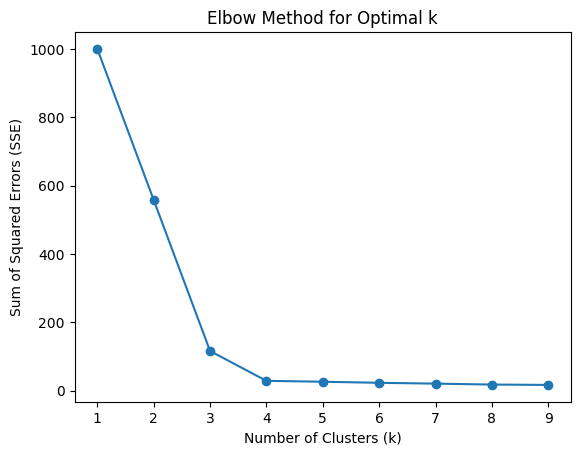

In [14]:
# Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


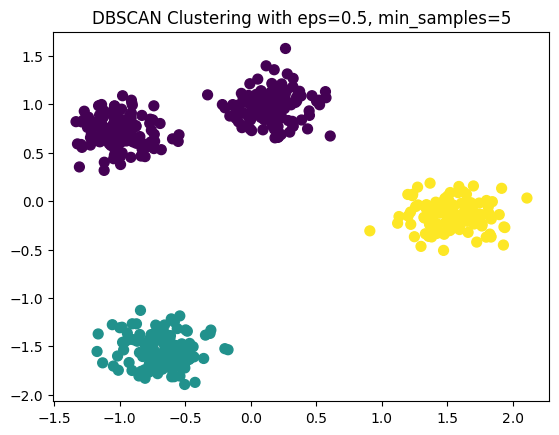

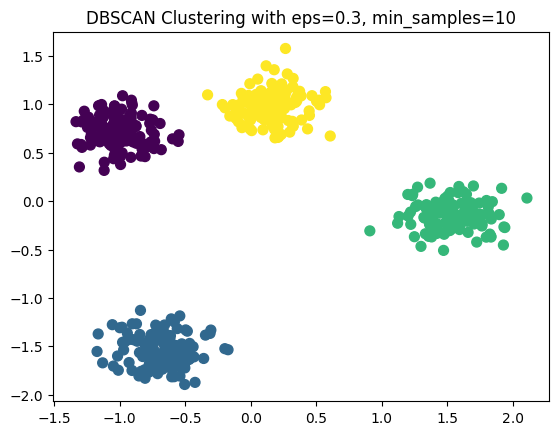

In [15]:
# Try different values of eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Change eps and min_samples to test different settings
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering with eps=0.5, min_samples=5')
plt.show()

# Experiment with other values
dbscan_alt = DBSCAN(eps=0.3, min_samples=10)
dbscan_alt_labels = dbscan_alt.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_alt_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering with eps=0.3, min_samples=10')
plt.show()
